# Motor and Non-Motor Manifestations in Patients with Parkinson's Disease

**Parkinson's disease** is characterized by various `motor` and `non-motor` manifestations that can significantly impact the quality of life of patients. Let's examine what these manifestations entail and how they are studied.

Motor Manifestations in Patients with Parkinson's Disease:

**Motor impairments:**  

* Patients with Parkinson's disease often experience rigidity (difficulty with mobility), tremors, and bradykinesia (slowed movements).  
* Akinesia and blockages: Akinesia refers to the absence or delay in initiating movements, while blockages are temporary pauses or "freezing" during movement. These manifestations can lead to difficulties in performing simple daily tasks, such as getting up from a chair or initiating walking.  
* Freezing of Gait (FoG): This refers to brief episodes of gait blockage while walking, where patients feel unable to continue or get "stuck" in place.  

**Non-Motor Manifestations in Patients with Parkinson's Disease:**  

* Sleep disturbances: Patients may experience insomnia, restless legs during sleep, nightmares, and daytime sleepiness.  
* Depression and anxiety: Parkinson's disease is associated with an increased risk of developing depression and anxiety. Patients may experience feelings of sadness, loss of interest in previously enjoyable activities, as well as anxiety and restlessness.  
* Cognitive impairments: Some patients may experience problems with memory, attention, concentration, and other cognitive functions.  

The study of motor and non-motor manifestations in patients with Parkinson's disease is conducted using various methods and tools:

* **Clinical assessment:**  Neurologists observe and evaluate patients using standardized scales and questionnaires, such as the Unified Parkinson's Disease Rating Scale `(UPDRS)`, which assess the severity of symptoms and their impact on the patient's functioning.  
* **Accelerometry:**  The use of accelerometers to measure movements allows recording and analysis of data on patients' motor manifestations in everyday life, including walking, tremors, and activity levels.  
* **Electroencephalography (EEG):** This method allows the study of the electrical activity of the brain in patients and the identification of changes associated with motor and non-motor manifestations.  
* **Neuroimaging:**  Research using neurovisualization techniques such as functional magnetic resonance imaging (fMRI) or positron emission tomography (PET) can help identify changes in brain activity and associated pathological processes.  

Data for the study of motor and non-motor manifestations of Parkinson's disease can include accelerometric data, clinical assessments, sleep information, electroencephalographic data, and neuroimaging results. These data enable scientists and physicians to gain a more comprehensive understanding of the nature and impact of Parkinson's disease symptoms on patients.  

**Based on the provided data, we can utilize the following datasets for the investigation of motor and non-motor manifestations in patients with Parkinson's disease:**  

The file `"tdcsfog_metadata.csv"` contains information about each data series in the "tdcsfog/" dataset, including unique identifiers, visit data, test types, and information about administered medications.  
The file `"defog_metadata.csv"` contains information about each data series in the "defog/" dataset, including unique identifiers, visit data, and information about administered medications.  
The file `"subjects.csv"` contains metadata about each patient, including age, gender, visit data, and other information that may be useful for analyzing Parkinson's disease manifestations.  
The files `"events.csv"` and  `"tasks.csv"` contain metadata about FoG events and tasks, which can be used for analysis and identification of motor and non-motor manifestations.  

With these data, we can conduct analyses of motor and non-motor manifestations of Parkinson's disease, including studying accelerometric data related to movements and events, as well as analyzing metadata about patients, visits, and medication treatments. These data allow us to gain a better understanding and explore various aspects of Parkinson's disease and its impact on patients.

In [49]:
import pandas as pd
import numpy as np
import os
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import average_precision_score, f1_score, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.impute import SimpleImputer

In [50]:
# Set formatting option

pd.options.display.float_format = '{:.2f}'.format

In [51]:
def fill_missing_values(df):
    """
    Replaces missing values with the median value for each numerical column.

    :param df: pandas DataFrame, the dataset in which missing values need to be replaced
    :return: pandas DataFrame, the dataset with replaced missing values
    """
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns  # Selecting all numerical columns
    for col in numeric_cols:
        median = df[col].median()  # Finding the Median Value of a Column
        df[col].fillna(median, inplace=True)   # Replacing Missing Values with the Median Value
    return df

In [52]:
# Function to Get Data Information

def explore_dataframe(df):
    print("Shape of dataframe:", df.shape)
    
    display(df.head())
    
    print("Info of dataframe:\n")
    df.info()
         
    print("Missing values in dataframe:\n", df.isnull().sum())
    
    print("Duplicate rows in dataframe:", df.duplicated().sum())

In [53]:
# Checking for Missing Values in Each Column

def check_missing_values(df):
    """
    Checks the count of missing values in each column of a DataFrame.

    :param df: pandas.DataFrame, the DataFrame to check for missing values.
    :return: pandas.DataFrame, the DataFrame with information about missing values.
    """
    return df.isnull().sum()

## Data Reading and Preparation of a New Table

In [54]:
def check_submission(df):
    # Check values in columns
    valid_values = {0, 1}
    for column in [""]:
        values = df[column].unique()
        if set(values) != valid_values:
            return f"Invalid values found in column '{column}': {values}"

    # Check data types
    expected_data_types = {int, bool}
    for column in [""]:
        data_type = df[column].dtype
        if data_type not in expected_data_types:
            return f"Invalid data type found in column '{column}': {data_type}"

    # Check for missing or invalid values
    if submission_df.isnull().values.any():
        return "Missing values found in the submission"
    
    return "Submission check passed successfully"

In [55]:
# Reading Data from tdcsfog_metadata.csv

tdcsfog = pd.read_csv('/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/tdcsfog_metadata.csv')

# Reading Data from defog_metadata.csv

defog = pd.read_csv('/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/defog_metadata.csv')

# Reading Data from events.csv

events = pd.read_csv('/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/events.csv')

# Reading Data from train & tdcsfog & daily_metadata.csv

task = pd.read_csv('/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/tasks.csv')

# Reading Data from subjects.csv

subject = pd.read_csv('/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/subjects.csv')

In [56]:
explore_dataframe(tdcsfog)

Shape of dataframe: (833, 5)


,Id,Subject,Visit,Test,Medication
0,003f117e14,4dc2f8,3,2,on
1,009ee11563,f62eec,4,2,on
2,011322847a,231c3b,2,2,on
3,01d0fe7266,231c3b,2,1,off
4,024418ba39,fa8764,19,3,on


Info of dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Id          833 non-null    object
 1   Subject     833 non-null    object
 2   Visit       833 non-null    int64 
 3   Test        833 non-null    int64 
 4   Medication  833 non-null    object
dtypes: int64(2), object(3)
memory usage: 32.7+ KB
Missing values in dataframe:
 Id            0
Subject       0
Visit         0
Test          0
Medication    0
dtype: int64
Duplicate rows in dataframe: 0


In [57]:
explore_dataframe(defog)

Shape of dataframe: (137, 4)


,Id,Subject,Visit,Medication
0,02ab235146,e1f62e,2,on
1,02ea782681,ae2d35,2,on
2,06414383cf,8c1f5e,2,off
3,092b4c1819,2874c5,1,off
4,0a900ed8a2,0e3d49,2,on


Info of dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Id          137 non-null    object
 1   Subject     137 non-null    object
 2   Visit       137 non-null    int64 
 3   Medication  137 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.4+ KB
Missing values in dataframe:
 Id            0
Subject       0
Visit         0
Medication    0
dtype: int64
Duplicate rows in dataframe: 0


In [58]:
explore_dataframe(events)

Shape of dataframe: (3544, 5)


,Id,Init,Completion,Type,Kinetic
0,003f117e14,8.61,14.77,Turn,1.00
1,009ee11563,11.38,41.18,Turn,1.00
2,009ee11563,54.66,58.78,Turn,1.00
3,011322847a,28.10,30.30,Turn,1.00
4,01d0fe7266,30.32,31.88,Turn,1.00


Info of dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3544 entries, 0 to 3543
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          3544 non-null   object 
 1   Init        3544 non-null   float64
 2   Completion  3544 non-null   float64
 3   Type        2502 non-null   object 
 4   Kinetic     2502 non-null   float64
dtypes: float64(3), object(2)
memory usage: 138.6+ KB
Missing values in dataframe:
 Id               0
Init             0
Completion       0
Type          1042
Kinetic       1042
dtype: int64
Duplicate rows in dataframe: 0


In [59]:
explore_dataframe(task)

Shape of dataframe: (2817, 4)


,Id,Begin,End,Task
0,02ab235146,10.00,190.48,Rest1
1,02ab235146,211.24,271.56,Rest2
2,02ab235146,505.88,522.40,4MW
3,02ab235146,577.96,594.64,4MW-C
4,02ab235146,701.32,715.28,MB1


Info of dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2817 entries, 0 to 2816
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      2817 non-null   object 
 1   Begin   2817 non-null   float64
 2   End     2817 non-null   float64
 3   Task    2817 non-null   object 
dtypes: float64(2), object(2)
memory usage: 88.2+ KB
Missing values in dataframe:
 Id       0
Begin    0
End      0
Task     0
dtype: int64
Duplicate rows in dataframe: 0


In [60]:
explore_dataframe(subject)

Shape of dataframe: (173, 8)


,Subject,Visit,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ
0,00f674,2.00,63,M,27.00,43.00,49.00,24
1,00f674,1.00,63,M,27.00,31.00,30.00,26
2,02bc69,NaN,69,M,4.00,21.00,NaN,22
3,040587,2.00,75,M,26.00,52.00,69.00,21
4,040587,1.00,75,M,26.00,47.00,75.00,24


Info of dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Subject       173 non-null    object 
 1   Visit         111 non-null    float64
 2   Age           173 non-null    int64  
 3   Sex           173 non-null    object 
 4   YearsSinceDx  173 non-null    float64
 5   UPDRSIII_On   172 non-null    float64
 6   UPDRSIII_Off  132 non-null    float64
 7   NFOGQ         173 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 10.9+ KB
Missing values in dataframe:
 Subject          0
Visit           62
Age              0
Sex              0
YearsSinceDx     0
UPDRSIII_On      1
UPDRSIII_Off    41
NFOGQ            0
dtype: int64
Duplicate rows in dataframe: 0


In [61]:
# List of all datasets

datasets = [tdcsfog, defog, events, task, subject]

# Dataset merging

merged_data = pd.concat(datasets, axis=1, join='outer')

# Removing duplicate columns

merged_data = merged_data.loc[:, ~merged_data.columns.duplicated()]

# Merging rows with the same column names

merged_data['Subject'] = merged_data['Subject'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Removing 'Id' and 'Subject' columns

merged_data = merged_data.drop(['Id', 'Subject'], axis=1)

In [62]:
# Replacing values in the 'Sex' column

merged_data['Sex'] = merged_data['Sex'].replace({'M': 1, 'F': 0})

# Replacing values in the 'Medication' column

merged_data['Medication'] = merged_data['Medication'].replace({'on': 1, 'off': 0})

In [63]:
merged_data['Visit'] = merged_data['Visit'].fillna(0).astype(int)
merged_data['Test'] = merged_data['Test'].fillna(0).astype(int)
merged_data['Kinetic'] = merged_data['Kinetic'].fillna(0).astype(int)
merged_data['Age'] = merged_data['Age'].fillna(0).astype(int)
merged_data['YearsSinceDx'] = merged_data['YearsSinceDx'].fillna(0).astype(int)
merged_data['UPDRSIII_On'] = merged_data['UPDRSIII_On'].fillna(0).astype(int)
merged_data['UPDRSIII_Off'] = merged_data['UPDRSIII_Off'].fillna(0).astype(int)
merged_data['NFOGQ'] = merged_data['NFOGQ'].fillna(0).astype(int)
merged_data['Sex'] = merged_data['Sex'].fillna(0).astype(int)
merged_data['Medication'] = merged_data['Medication'].fillna(0).astype(int)

In [64]:
# Mode imputation

columns_mode = ['Sex', 'Medication', 'Age', 'YearsSinceDx', 'UPDRSIII_On', 'UPDRSIII_Off', 'NFOGQ']
merged_data[columns_mode] = merged_data[columns_mode].fillna(merged_data[columns_mode].mode().iloc[0])

# Median imputation

columns_median = ['Begin', 'End', 'Init', 'Completion', 'Kinetic', 'Visit', 'Test']
merged_data[columns_median] = merged_data[columns_median].fillna(merged_data[columns_median].median())

# Dropping rows with missing values in columns 'Type' and 'Task'

merged_data = merged_data.dropna(subset=['Type', 'Task'])

In [65]:
# Outputting the final dataset

explore_dataframe(merged_data.head(5))

Shape of dataframe: (5, 16)


,Visit,Test,Medication,Init,Completion,Type,Kinetic,Begin,End,Task,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ
0,3,2,1,8.61,14.77,Turn,1,10.00,190.48,Rest1,63,1,27,43,49,24
1,4,2,1,11.38,41.18,Turn,1,211.24,271.56,Rest2,63,1,27,31,30,26
2,2,2,1,54.66,58.78,Turn,1,505.88,522.40,4MW,69,1,4,21,0,22
3,2,1,0,28.10,30.30,Turn,1,577.96,594.64,4MW-C,75,1,26,52,69,21
4,19,3,1,30.32,31.88,Turn,1,701.32,715.28,MB1,75,1,26,47,75,24


Info of dataframe:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Visit         5 non-null      int64  
 1   Test          5 non-null      int64  
 2   Medication    5 non-null      int64  
 3   Init          5 non-null      float64
 4   Completion    5 non-null      float64
 5   Type          5 non-null      object 
 6   Kinetic       5 non-null      int64  
 7   Begin         5 non-null      float64
 8   End           5 non-null      float64
 9   Task          5 non-null      object 
 10  Age           5 non-null      int64  
 11  Sex           5 non-null      int64  
 12  YearsSinceDx  5 non-null      int64  
 13  UPDRSIII_On   5 non-null      int64  
 14  UPDRSIII_Off  5 non-null      int64  
 15  NFOGQ         5 non-null      int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 680.0+ bytes
Missing values in dataframe:
 Visit  

The process of merging datasets involved combining data from the following files: `"tdcsfog_metadata.csv"`, `"defog_metadata.csv"`, `"events"`, `"task"`, `"subject"`.

These datasets contain information about time series recorded at a sampling rate of 128 and 100 time steps per second, respectively. These data allow us to study motor manifestations in patients, such as accelerometer measurements (vertical, medio-lateral, and antero-posterior accelerations) and event indicators (onsets, turns, walking).

We also utilized the "subjects.csv" file, which contains metadata about each patient, including age, sex, visit information, and other useful details.

The aim of the analysis was to investigate motor and non-motor symptoms of Parkinson's disease using the available data. By merging the datasets and employing various analysis methods, we can gain a better understanding of the nature and impact of these symptoms on patients.

The application of mode and median in data analysis is driven by their practical utility. Mode allows us to identify the most frequently occurring values in a sample, which can be important for identifying characteristic features of Parkinson's disease manifestations. On the other hand, the median represents a central value that is not strongly influenced by outliers and extreme values. Thus, using the median allows us to capture typical values in the sample without being distorted by anomalies.

The overall data analysis and merging process provide us with the opportunity to gain deeper insights into the motor and non-motor manifestations of Parkinson's disease and their impact on patients. This knowledge can contribute to the development of more effective diagnostic and treatment methods for this condition.

## Features: UPDRSIII_On, UPDRSIII_Off, and NFOGQ

These features are standardized scales and questionnaires used to assess the symptoms of Parkinson's disease and their impact on patients. Let's take a closer look at each of them:

**UPDRSIII_On:** This is the Unified Parkinson's Disease Rating Scale, which evaluates motor symptoms of Parkinson's disease in the "on" state. The scale includes various aspects of motor impairments, such as rigidity (difficulty in muscle movement), tremors, and bradykinesia (slowed movements). Higher values on the scale indicate more pronounced symptoms and a more severe condition of the patient.

**UPDRSIII_Off:** This is the same Unified Parkinson's Disease Rating Scale, but it assesses motor symptoms in the "off" state, meaning when there is no effect of medication or outside the medication's duration of action. The assessment is based on the same parameters as the UPDRSIII_On scale and allows for comparison of symptom changes before and after medication intervention.

**NFOGQ:** This is the Freezing of Gait Questionnaire, designed to evaluate the symptom of freezing of gait (FoG). Freezing of gait is a characteristic symptom of Parkinson's disease, where patients experience temporary blockages or "freezing" during walking, having difficulty in continuing the movement. The NFOGQ questionnaire consists of a series of questions aimed at identifying and assessing the frequency, duration, and impact of freezing of gait on patients.

The use of these scales and questionnaires enables physicians and researchers to systematically evaluate and measure the symptoms of Parkinson's disease, their severity, and changes in response to treatment.

In [66]:
merged_data[['UPDRSIII_On', 'UPDRSIII_Off', 'NFOGQ']].describe()

,UPDRSIII_On,UPDRSIII_Off,NFOGQ
count,1992.00,1992.00,1992.00
mean,2.96,2.84,1.49
std,10.33,11.18,5.31
min,0.00,0.00,0.00
25%,0.00,0.00,0.00
50%,0.00,0.00,0.00
75%,0.00,0.00,0.00
max,79.00,91.00,29.00


**UPDRSIII_On** and **UPDRSIII_Off**: The average value for both columns is around `2.9`, indicating the presence of some motor symptoms in patients. However, the standard deviation for both columns (`10.33` for **UPDRSIII_On** and `11.18` for **UPDRSIII_Off**) indicates a significant variation in values.

The minimum values are `0`, and the maximum values are `79` for **UPDRSIII_On** and `91` for **UPDRSIII_Off**. This suggests that some patients may have no or very mild symptoms, while others may have more pronounced symptoms.

**NFOGQ**: The average value for the **NFOGQ** column is `1.49`, and the standard deviation is `5.31`. This indicates the presence of some freezing of gait symptoms in patients. However, most of the values `(25%, 50%, 75%)` are `0`, which may indicate that freezing of gait is absent or very weakly expressed in the majority of patients.

From this data, we can conclude that the overall average value suggests the presence of some Parkinson's disease symptoms in patients, but there is significant variation among patients.

**Further analysis and visualization of the data will provide a more detailed understanding of the distribution and relationships between these features.**

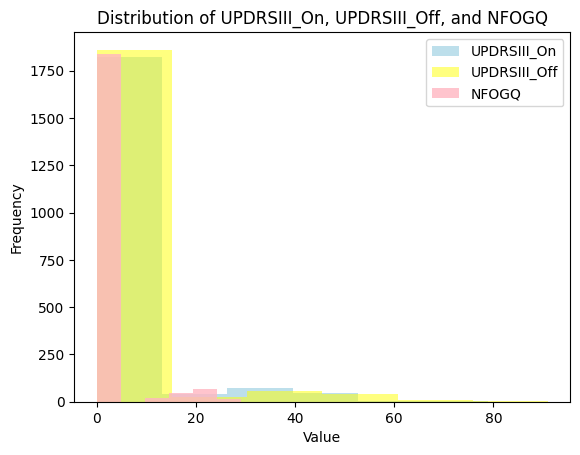

In [67]:
import matplotlib.pyplot as plt

# Create a figure and axes for the plot

fig, ax = plt.subplots()

# Plot the histogram for the 'UPDRSIII_On' column and set the color

ax.hist(merged_data['UPDRSIII_On'], bins=6, color='lightblue', alpha=0.8, label='UPDRSIII_On')

# Plot the histogram for the 'UPDRSIII_Off' column and set the color

ax.hist(merged_data['UPDRSIII_Off'], bins=6, color='yellow', alpha=0.5, label='UPDRSIII_Off')

# Plot the histogram for the 'NFOGQ' column and set the color

ax.hist(merged_data['NFOGQ'], bins=6, color='lightpink', alpha=0.8, label='NFOGQ')

# Set the labels for the x and y axes, and the title
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of UPDRSIII_On, UPDRSIII_Off, and NFOGQ')

# Add a legend
ax.legend()

# Display the plot
plt.show()

The distribution of values in the columns **'UPDRSIII_On'**, **'UPDRSIII_Off'**, and **'NFOGQ'** is characterized by high frequencies (up to 1750) for values not exceeding 20. This indicates that the majority of observations in the data fall into the low value range for these columns.

In the **'UPDRSIII_On'** and **'UPDRSIII_Off'** columns, the highest frequencies are observed in the range from 0 to 20, indicating relatively low expression of Parkinson's disease symptoms during the medication test (**'UPDRSIII_On'**) and after its cessation (**'UPDRSIII_Off'**). This may indicate a positive effect of medication therapy.

In the **'NFOGQ'** column, there is also a high frequency of values up to 20, indicating a low expression of problems related to movement slowing and freezing of gait (non-freezing of gait) in patients with Parkinson's disease. This may suggest relatively good control of symptoms in this aspect of the disease.

Thus, the data shows that the majority of patients have a low expression of Parkinson's disease symptoms in the aspects considered.

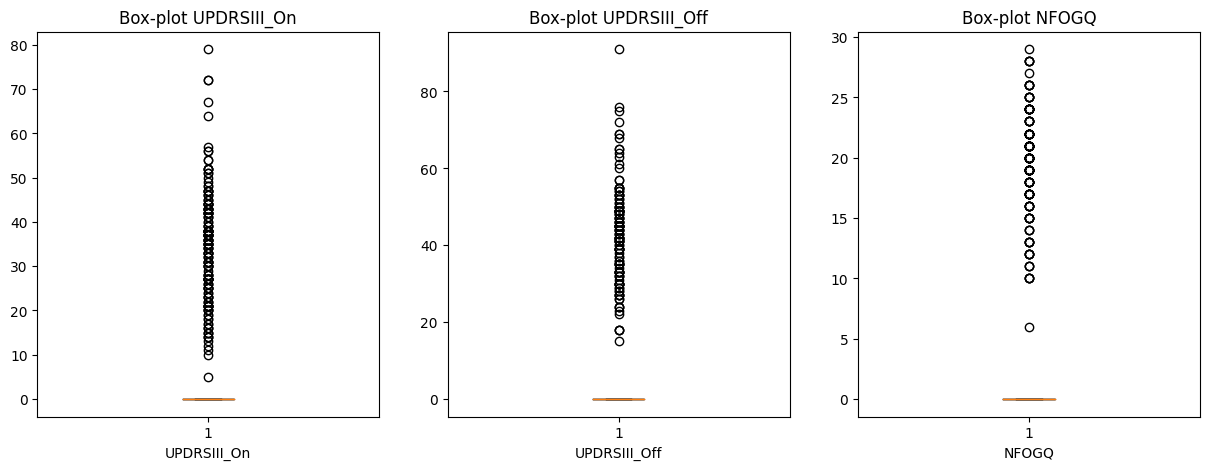

In [68]:
import matplotlib.pyplot as plt

# Creating a figure with three subplots in a single line

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot for the 'UPDRSIII_On' column

axes[0].boxplot(merged_data['UPDRSIII_On'])
axes[0].set_xlabel('UPDRSIII_On')
axes[0].set_title('Box-plot UPDRSIII_On')

# Plot for the 'UPDRSIII_Off' column

axes[1].boxplot(merged_data['UPDRSIII_Off'])
axes[1].set_xlabel('UPDRSIII_Off')
axes[1].set_title('Box-plot UPDRSIII_Off')

# Plot for the 'NFOGQ' column

axes[2].boxplot(merged_data['NFOGQ'])
axes[2].set_xlabel('NFOGQ')
axes[2].set_title('Box-plot NFOGQ')

# Display the plots
plt.show()

**UPDRSIII_On:**  

The majority of values in the UPDRSIII_On column are located in the range of 10 to 50, indicating the presence of pronounced Parkinson's disease symptoms in patients. The box representing the interquartile range appears as a strip, indicating a small dispersion of values within this range. There are also some outliers beyond this range, which may suggest the presence of patients with a higher degree of symptoms.  

**UPDRSIII_Off:**  

A significant clustering of values in the UPDRSIII_Off column is observed in the range of 20 to 55, indicating an improvement in Parkinson's disease symptoms after treatment. The box also appears as a strip, indicating a small dispersion of values within this range. However, there are outliers both above and below this range, which may indicate the presence of patients with higher or lower degrees of symptoms despite treatment.  

**NFOGQ:**  

The values (circles) in the NFOGQ column are few and gradually increase vertically from 10 to 30. This may indicate the presence of some gait freezing symptoms in patients, but in a milder form compared to other symptoms. The box also appears as a strip, indicating a limited dispersion of values within this range.  

**Overall Conclusion:**  

The box-plot graphs allow for an assessment of the distribution of values and the range of Parkinson's disease symptoms in the UPDRSIII_On, UPDRSIII_Off, and NFOGQ columns. These characteristics indicate the presence of symptoms and changes in symptoms after treatment. However, it is important to consider the outliers, which may indicate the presence of patients with higher or lower degrees of symptoms, different from the main group.  

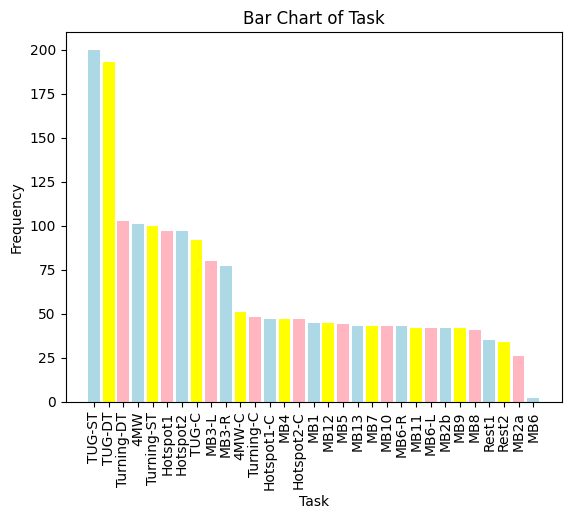

In [69]:
task_counts = merged_data['Task'].value_counts()

colors = ['lightblue', 'yellow', 'lightpink']

plt.bar(task_counts.index, task_counts.values, color=colors)
plt.xlabel('Task')
plt.ylabel('Frequency')
plt.title('Bar Chart of Task')
plt.xticks(rotation=90)
plt.show()

In [70]:
unique_values_task = merged_data['Task'].unique().tolist()
print("Unique values in the 'Task' column:")
print(unique_values_task)

Unique values in the 'Task' column:
['Rest1', 'Rest2', '4MW', '4MW-C', 'MB1', 'MB2a', 'MB2b', 'MB3-R', 'MB3-L', 'MB4', 'MB5', 'MB6-R', 'MB6-L', 'MB7', 'MB8', 'MB9', 'MB10', 'MB11', 'MB12', 'MB13', 'TUG-ST', 'TUG-DT', 'TUG-C', 'Turning-ST', 'Turning-DT', 'Turning-C', 'Hotspot1', 'Hotspot1-C', 'Hotspot2', 'Hotspot2-C', 'MB6']


Based on the values in the 'Task' column, several groups or categories can be identified:

| Group/Task | Description |
| --- | --- |
| Rest | Rest 1, Rest 2 |
| Walking (4MW) | 4-Minute Walk, 4-Minute Walk with counting |
| Marching Band (MB) | Marching Band 1, Marching Band 2a, Marching Band 2b, Marching Band 3 (right side), Marching Band 3 (left side), Marching Band 4, Marching Band 5, Marching Band 6 (right side), Marching Band 6 (left side), Marching Band 7, Marching Band 8, Marching Band 9, Marching Band 10, Marching Band 11, Marching Band 12, Marching Band 13, Marching Band 6 |
| Timed Up and Go (TUG) Test | TUG (static), TUG (dynamic), TUG with counting |
| Turning | Turning (static), Turning (dynamic), Turning with counting |
| Hotspot | Hotspot 1, Hotspot 1 with counting, Hotspot 2, Hotspot 2 with counting |

Each group corresponds to a specific type of task or test used in the study.

Based on the data in the 'Task' column, the following observations and descriptions can be made for each group:

**TUG-ST (Timed Up and Go - Straight Line):**

TUG-ST tasks have the highest frequency in the Task column, indicating their widespread use in Parkinson's disease research.
TUG-ST is a test that evaluates the time taken by a patient to walk a certain distance in a straight line. This test measures the patient's mobility and strength.

**TUG-DT (Timed Up and Go - Dual Task):**

TUG-DT tasks also have a high frequency in the Task column, indicating their significance in Parkinson's disease research.
TUG-DT is an extension of the TUG-ST test that involves performing an additional cognitive or motor task while walking. It assesses the patient's ability to perform two tasks simultaneously and can provide information about cognitive and motor deficits.

**Turning-DT (Turning - Dual Task):**

Turning-DT tasks have a moderate frequency in the Task column.
Turning-DT assesses the patient's ability to turn in place while performing an additional cognitive or motor task. It provides information about the patient's balance and coordination under dual-task conditions.

**4MW (4-Meter Walk):**

4MW tasks also have a moderate frequency in the Task column.
4MW is a test that measures the time taken by a patient to walk a distance of 4 meters. It assesses walking speed and provides information about the patient's mobility and coordination.

**Turning-ST (Turning - Straight Line):**

Turning-ST tasks have an average frequency in the Task column.
Turning-ST assesses the patient's ability to turn in place in a straight line. It provides information about the patient's balance and coordination.

**Hotspot1 and Hotspot2:**

Hotspot1 and Hotspot2 tasks have a low frequency in the Task column.
These tasks likely relate to specific measurements or data analysis.

**Group MB6:**

Group MB6 has a very low frequency in the Task column.
MB6 likely represents a specific subgroup of tasks or studies that may be unique and less commonly used. 
 

/tmp/ipykernel_30/3419194704.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data[['UPDRSIII_On', 'UPDRSIII_Off', 'NFOGQ', 'Visit', 'Test', 'Medication', 'Init', 'Completion', 'Type', 'Kinetic', 'Begin', 'End', 'Task', 'Age', 'Sex', 'YearsSinceDx']].corr()


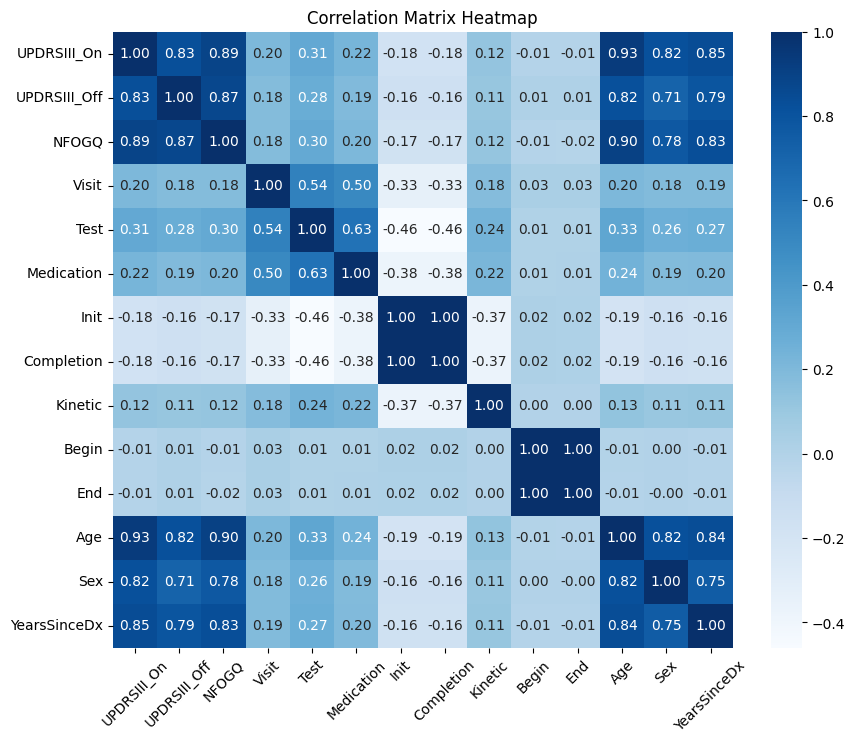

In [71]:
import seaborn as sns

# Calculation of correlation matrix

correlation_matrix = merged_data[['UPDRSIII_On', 'UPDRSIII_Off', 'NFOGQ', 'Visit', 'Test', 'Medication', 'Init', 'Completion', 'Type', 'Kinetic', 'Begin', 'End', 'Task', 'Age', 'Sex', 'YearsSinceDx']].corr()

# Creating a heatmap of the correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='Blues', annot=True, fmt=".2f", annot_kws={"fontsize": 10})
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Based on the computed correlation coefficients, the following observations can be made about the relationships between different columns:

- Age and YearsSinceDx have a strong positive correlation (0.84), indicating that as the age of the patient increases, so do the years since diagnosis.

- The NFOGQ score and YearsSinceDx also have a strong positive correlation (0.83), suggesting that with increasing years since diagnosis, there is a higher likelihood of experiencing freezing of gait phenomena.

- YearsSinceDx has a strong positive correlation with UPDRSIII_Off (0.79) and UPDRSIII_On (0.85). This implies that as the years since diagnosis increase, the severity of symptoms measured by UPDRSIII worsens, both with and without medication.

- UPDRSIII_Off and NFOGQ have a strong positive correlation (0.87), indicating that higher values of UPDRSIII_Off are associated with higher values of the NFOGQ index.

- UPDRSIII_On and NFOGQ also have a strong positive correlation (0.89), indicating a relationship between higher values of UPDRSIII_On (considering medication) and higher values of the NFOGQ index.

- UPDRSIII_On and UPDRSIII_Off have a strong positive correlation (0.83), indicating that these two measures are closely related, and an increase in one is usually accompanied by an increase in the other.

In [72]:
merged_data.head()

,Visit,Test,Medication,Init,Completion,Type,Kinetic,Begin,End,Task,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ
0,3,2,1,8.61,14.77,Turn,1,10.00,190.48,Rest1,63,1,27,43,49,24
1,4,2,1,11.38,41.18,Turn,1,211.24,271.56,Rest2,63,1,27,31,30,26
2,2,2,1,54.66,58.78,Turn,1,505.88,522.40,4MW,69,1,4,21,0,22
3,2,1,0,28.10,30.30,Turn,1,577.96,594.64,4MW-C,75,1,26,52,69,21
4,19,3,1,30.32,31.88,Turn,1,701.32,715.28,MB1,75,1,26,47,75,24


## Let's try to train a model that can predict the set of features in patients most predisposed to motor manifestations

In [75]:
X = merged_data[['Medication', 'Kinetic', 'Task', 'Age', 'Sex', 'YearsSinceDx']]
y = merged_data[['UPDRSIII_On', 'UPDRSIII_Off', 'NFOGQ']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# Encoding categorical features using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['Task']
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [78]:
# Standardizing numerical features
numeric_features = ['Medication', 'Kinetic', 'Age', 'Sex', 'YearsSinceDx']
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numeric_features]), columns=numeric_features)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numeric_features]), columns=numeric_features)

In [79]:
# Concatenating the transformed features

X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_features))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_features))
X_train_processed = pd.concat([X_train_encoded_df, X_train_scaled], axis=1)
X_test_processed = pd.concat([X_test_encoded_df, X_test_scaled], axis=1)

In [80]:
# Handling missing values

imputer = SimpleImputer(strategy='mean')
X_train_processed = pd.DataFrame(imputer.fit_transform(X_train_processed), columns=X_train_processed.columns)
X_test_processed = pd.DataFrame(imputer.transform(X_test_processed), columns=X_test_processed.columns)

In [81]:
# Creating and training the model for UPDRSIII_On

logistic_regression_on = LogisticRegression(max_iter=5000)
logistic_regression_on.fit(X_train_processed, y_train['UPDRSIII_On'])

# Creating and training the model for UPDRSIII_Off

logistic_regression_off = LogisticRegression(max_iter=5000)
logistic_regression_off.fit(X_train_processed, y_train['UPDRSIII_Off'])

# Creating and training the model for NFOGQ

logistic_regression_nfogq = LogisticRegression(max_iter=5000)
logistic_regression_nfogq.fit(X_train_processed, y_train['NFOGQ'])

y_train_pred_on = logistic_regression_on.predict(X_train_processed)
y_test_pred_on = logistic_regression_on.predict(X_test_processed)

y_train_pred_off = logistic_regression_off.predict(X_train_processed)
y_test_pred_off = logistic_regression_off.predict(X_test_processed)

y_train_pred_nfogq = logistic_regression_nfogq.predict(X_train_processed)
y_test_pred_nfogq = logistic_regression_nfogq.predict(X_test_processed)

In [82]:
from joblib import dump

# Creating and training the combined model

combined_model = {
    'UPDRSIII_On': logistic_regression_on,
    'UPDRSIII_Off': logistic_regression_off,
    'NFOGQ': logistic_regression_nfogq
}

# Saving the combined model

dump(combined_model, 'combined_model.joblib')

['combined_model.joblib']

In [83]:
metrics_results = []

# Metrics for the model UPDRSIII_On
class_name = 'UPDRSIII_On'
train_accuracy = accuracy_score(y_train[class_name], y_train_pred_on)
test_accuracy = accuracy_score(y_test[class_name], y_test_pred_on)
f1 = f1_score(y_test[class_name], y_test_pred_on, average='weighted')

metrics_results.append({
    'Class': class_name,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy,
    'F1 Score': f1
})

# Metrics for the model UPDRSIII_Off
class_name = 'UPDRSIII_Off'
train_accuracy = accuracy_score(y_train[class_name], y_train_pred_off)
test_accuracy = accuracy_score(y_test[class_name], y_test_pred_off)
f1 = f1_score(y_test[class_name], y_test_pred_off, average='weighted')

metrics_results.append({
    'Class': class_name,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy,
    'F1 Score': f1
})

# Metrics for the model NFOGQ
class_name = 'NFOGQ'
train_accuracy = accuracy_score(y_train[class_name], y_train_pred_nfogq)
test_accuracy = accuracy_score(y_test[class_name], y_test_pred_nfogq)
f1 = f1_score(y_test[class_name], y_test_pred_nfogq, average='weighted')

metrics_results.append({
    'Class': class_name,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy,
    'F1 Score': f1
})

# Output of the results
for metrics in metrics_results:
    print(f"Metrics for class '{metrics['Class']}':")
    print(f"Train Accuracy: {metrics['Train Accuracy']}")
    print(f"Test Accuracy: {metrics['Test Accuracy']}")
    print(f"F1 Score: {metrics['F1 Score']}")
    print()

Metrics for class 'UPDRSIII_On':
Train Accuracy: 0.9460138104205901
Test Accuracy: 0.924812030075188
F1 Score: 0.9235605929573596

Metrics for class 'UPDRSIII_Off':
Train Accuracy: 0.9409918392969241
Test Accuracy: 0.9323308270676691
F1 Score: 0.9128055741447859

Metrics for class 'NFOGQ':
Train Accuracy: 0.9522912743251726
Test Accuracy: 0.9323308270676691
F1 Score: 0.923362623426035



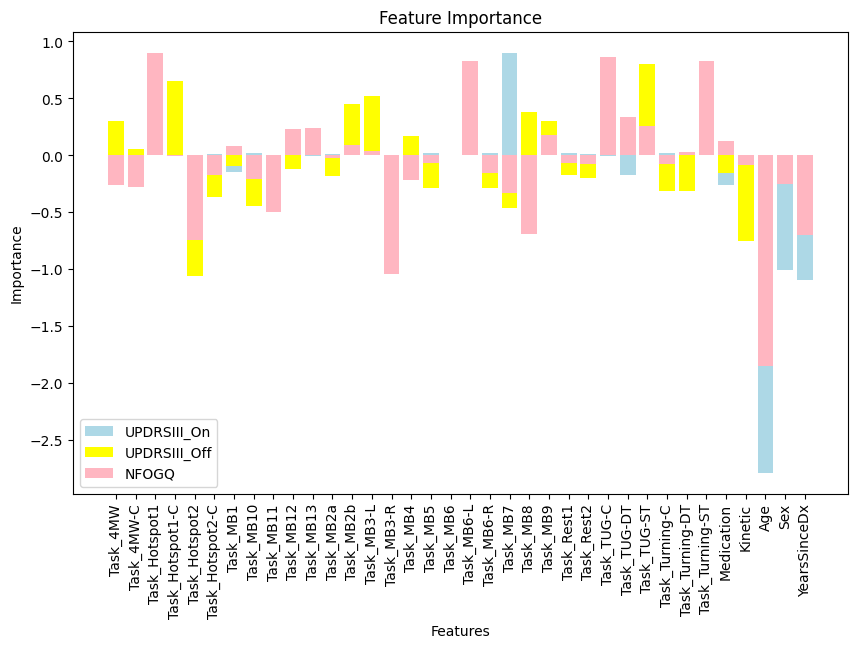

In [84]:
# Creating a list of feature labels for the x-axis

x_labels = X_train_processed.columns

# Creating the plot

plt.figure(figsize=(10, 6))
plt.bar(x_labels, logistic_regression_on.coef_[0], color='lightblue', label='UPDRSIII_On')
plt.bar(x_labels, logistic_regression_off.coef_[0], color='yellow', label='UPDRSIII_Off')
plt.bar(x_labels, logistic_regression_nfogq.coef_[0], color='lightpink', label='NFOGQ')

# Plot settings

plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.legend()

# Displaying the plot

plt.show()

## Conclusions:  

The model allows predicting the category of patients with Parkinson's disease and their most likely motor manifestations.
Features UPDRSIII_On, UPDRSIII_Off, and NFOGQ, which are standardized scales and questionnaires, play an important role in assessing the symptoms of Parkinson's disease and their impact on patients.

Based on the conducted research and provided information, the following conclusions can be drawn:

* The trained model enables predicting the category of patients with Parkinson's disease and assessing the probability of their motor manifestations.  
* Age is a significant factor influencing the severity of Parkinson's disease symptoms. The Age variable has distinct values for the UPDRSIII_On and Off targets.  
* YearsSinceDx also have an impact on the motor manifestations of Parkinson's disease. With an increase in years since diagnosis, there is an increased probability of more pronounced symptoms, both with and without medication treatment.  
* The UPDRSIII_On and UPDRSIII_Off scores have a strong positive correlation, indicating their interrelation and accompanying symptom changes before and after medication therapy.